In [ ]:
# Step 1: Upload the file
from google.colab import files
uploaded = files.upload()


Saving yield_df[1].csv to yield_df[1].csv


In [ ]:
# Step 2: Load the uploaded CSV into a pandas DataFrame
import pandas as pd

df = pd.read_csv('yield_df[1].csv')  # Make sure the filename matches exactly
df.head()  # Display first 5 rows


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
# Check shape of dataset
print("Shape of dataset:", df.shape)

# Display column names
print("\nColumn names:")
print(df.columns)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# View data types and non-null counts
print("\nInfo about dataset:")
print(df.info())

# Basic statistics
print("\nStatistical summary:")
print(df.describe())


Shape of dataset: (28242, 8)

Column names:
Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

Missing values in each column:
Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-

In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the uploaded CSV into a pandas DataFrame again
df = pd.read_csv('yield_df[1].csv')

# Drop index column
df = df.drop(columns=['Unnamed: 0'])

# Step 1: Bin 'hg/ha_yield' into 3 categories: Low, Medium, High
df['yield_class'] = pd.qcut(df['hg/ha_yield'], q=3, labels=['Low', 'Medium', 'High'])

# Step 2: Drop original yield column
df = df.drop(columns=['hg/ha_yield'])

# Step 3: Encode categorical columns
label_encoders = {}
for col in ['Area', 'Item']: # Only encode 'Area' and 'Item' as they are the only object type columns
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 4: Encode the target variable 'yield_class' numerically
le_yield = LabelEncoder()
df['yield_class'] = le_yield.fit_transform(df['yield_class'])


# Step 5: Define features and target
X = df.drop(columns=['yield_class'])
y = df['yield_class']

# Step 6: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Logistic Regression Performance Metrics
Accuracy : 0.4213
Precision: 0.4167
Recall   : 0.4213
F1 Score : 0.4157


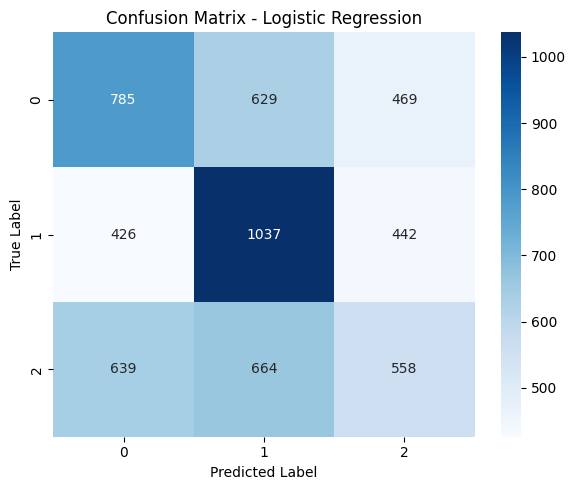

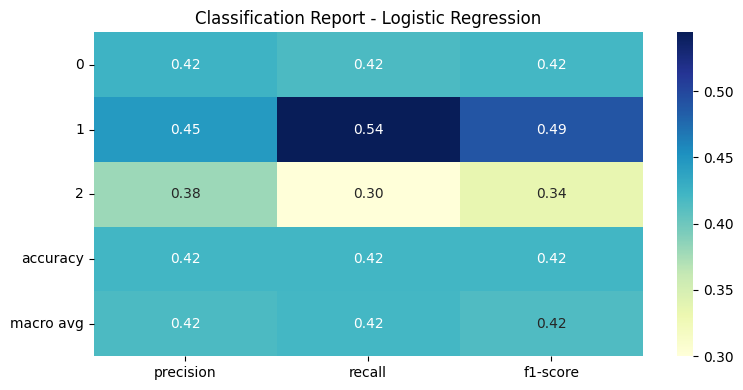

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Train the Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

# Print performance metrics
print("Logistic Regression Performance Metrics")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

# Plot Confusion Matrix (smaller size)
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot Classification Report (smaller size)
report = classification_report(y_test, y_pred_lr, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report - Logistic Regression")
plt.tight_layout()
plt.show()


Random Forest Performance Metrics
Accuracy : 0.9688
Precision: 0.9688
Recall   : 0.9688
F1 Score : 0.9688


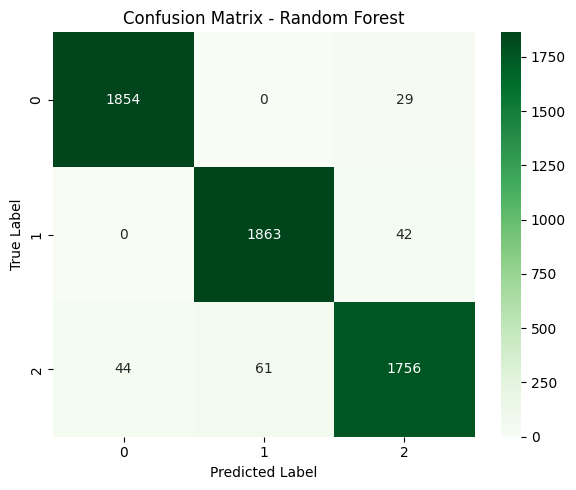

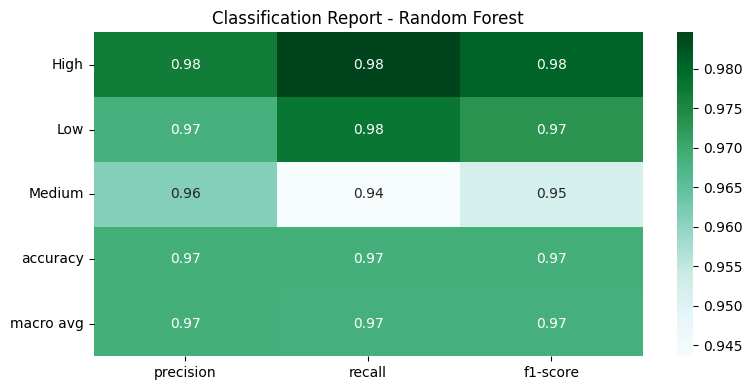

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Print performance metrics
print("Random Forest Performance Metrics")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot Classification Report
report = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="BuGn", fmt=".2f")
plt.title("Classification Report - Random Forest")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:11:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance Metrics
Accuracy : 0.9639
Precision: 0.9638
Recall   : 0.9639
F1 Score : 0.9639


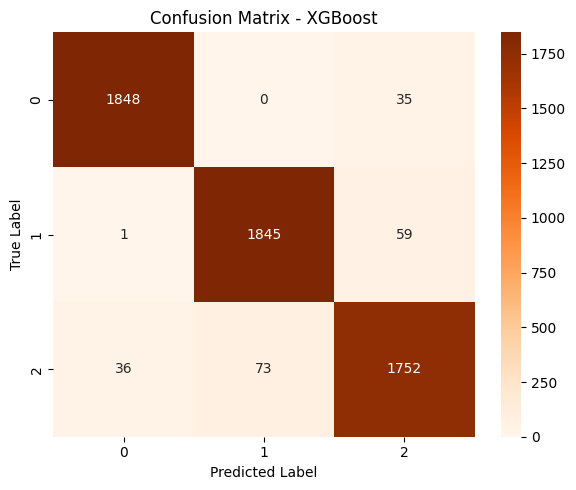

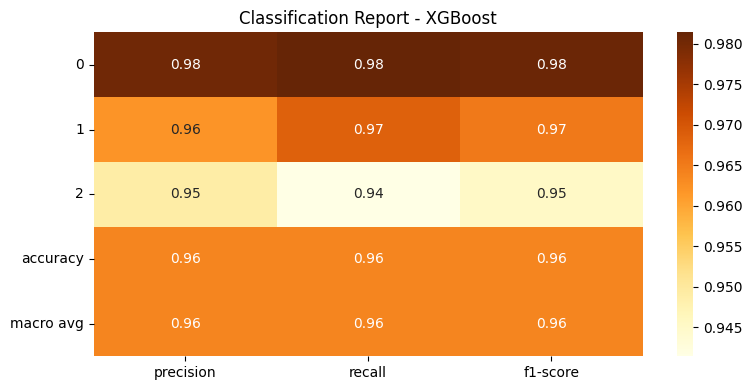

In [ ]:
# Install XGBoost if not already installed
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Print metrics
print("XGBoost Performance Metrics")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot Classification Report
report = classification_report(y_test, y_pred_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlOrBr", fmt=".2f")
plt.title("Classification Report - XGBoost")
plt.tight_layout()
plt.show()


SVM Performance Metrics
Accuracy : 0.6433
Precision: 0.6441
Recall   : 0.6433
F1 Score : 0.6407


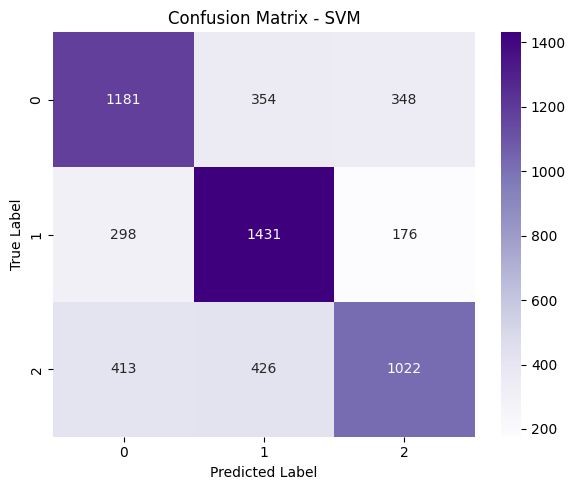

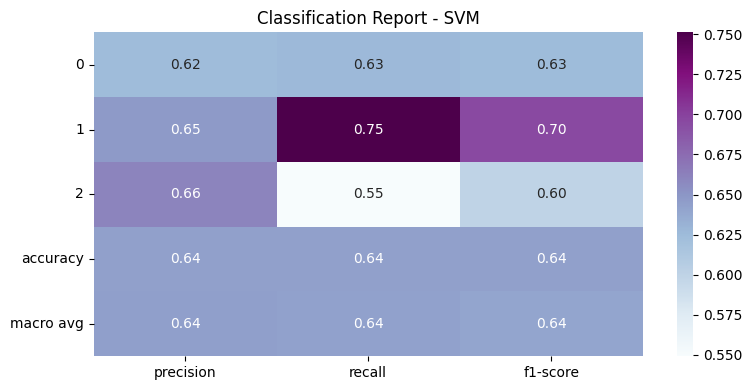

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train the SVM model
svm = SVC(kernel='rbf')  # You can also try 'linear' or 'poly'
svm.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

# Print metrics
print("SVM Performance Metrics")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot Classification Report
report = classification_report(y_test, y_pred_svm, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="BuPu", fmt=".2f")
plt.title("Classification Report - SVM")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.4457 - loss: 1.0482 - val_accuracy: 0.5133 - val_loss: 0.9702
Epoch 2/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5503 - loss: 0.9401 - val_accuracy: 0.6080 - val_loss: 0.8638
Epoch 3/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6296 - loss: 0.8271 - val_accuracy: 0.6597 - val_loss: 0.7526
Epoch 4/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6715 - loss: 0.7235 - val_accuracy: 0.6500 - val_loss: 0.6948
Epoch 5/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6896 - loss: 0.6703 - val_accuracy: 0.7062 - val_loss: 0.6489
Epoch 6/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7063 - loss: 0.6329 - val_accuracy: 0.7252 - val_loss: 0.6058
Epoch 7/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7268 - loss: 0.5980 - val_accuracy: 0.7363 - val_loss: 0.5791
Epoch 8/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7302 - loss: 0.5786 - val_accuracy: 0.

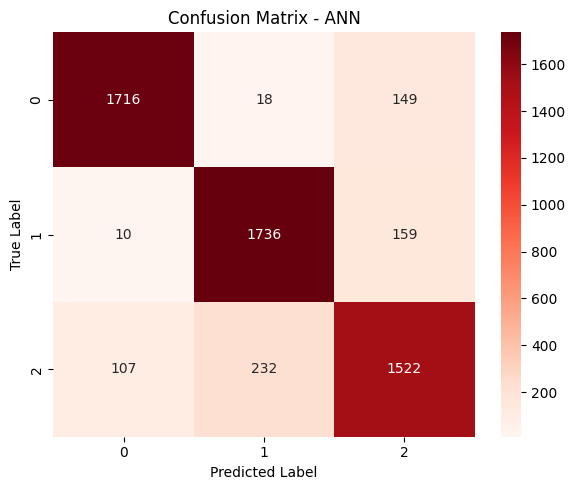

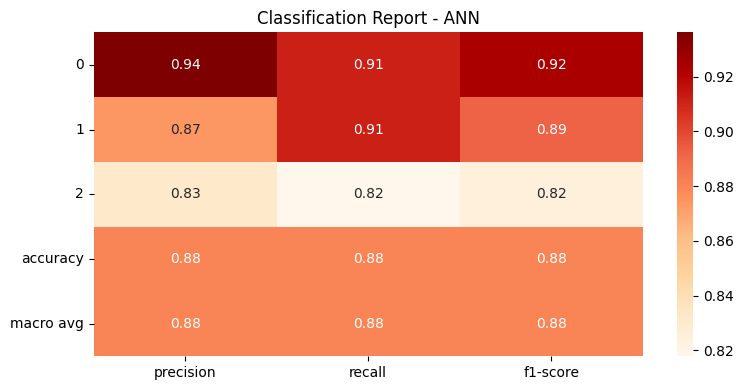

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Build the ANN model
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(y.unique()), activation='softmax')  # For multi-class classification
])

# Compile the model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate on test data
y_pred_ann_probs = ann.predict(X_test)
y_pred_ann = y_pred_ann_probs.argmax(axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann, average='weighted')
recall = recall_score(y_test, y_pred_ann, average='weighted')
f1 = f1_score(y_test, y_pred_ann, average='weighted')

# Print metrics
print("ANN Performance Metrics")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_ann, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="OrRd", fmt=".2f")
plt.title("Classification Report - ANN")
plt.tight_layout()
plt.show()


📊 Model Performance Comparison Table - yield_df.csv:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.4213,0.4167,0.4213,0.4157
1,Random Forest,0.9688,0.9688,0.9688,0.9680
2,XGBoost,0.9639,0.9638,0.9639,0.9639
3,SVM,0.6433,0.6441,0.6433,0.6400
4,ANN,0.8805,0.8808,0.8805,0.8805


/tmp/ipython-input-18-1858527142.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y='Accuracy', palette='crest')


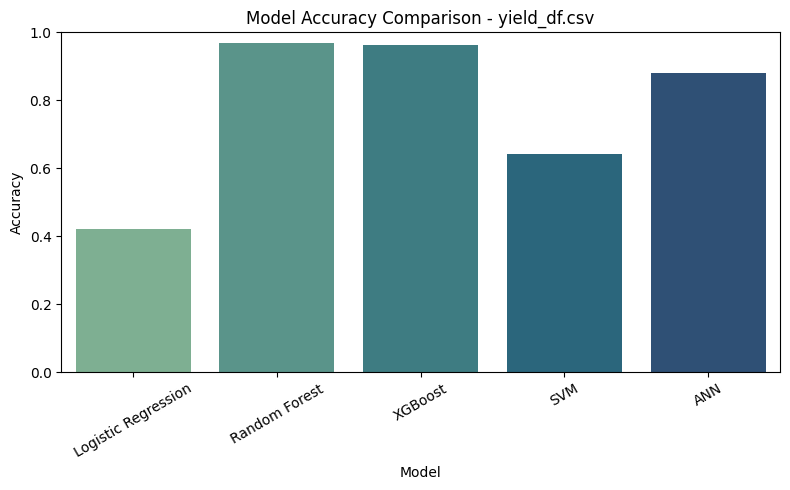

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your actual evaluation metrics for Dataset 3
metrics_df = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'XGBoost',
        'SVM',
        'ANN'
    ],
    'Accuracy':   [0.4213, 0.9688, 0.9639, 0.6433, 0.8805],
    'Precision':  [0.4167, 0.9688, 0.9638, 0.6441, 0.8808],
    'Recall':     [0.4213, 0.9688, 0.9639, 0.6433, 0.8805],
    'F1 Score':   [0.4157, 0.9680, 0.9639, 0.6400, 0.8805]
})

# Display the table
print("📊 Model Performance Comparison Table - yield_df.csv:")
display(metrics_df)

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=metrics_df, x='Model', y='Accuracy', palette='crest')
plt.title('Model Accuracy Comparison - yield_df.csv')
plt.xticks(rotation=30)
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


🔍 Performance Metrics
Accuracy : 0.9708
Precision: 0.9708
Recall   : 0.9708
F1 Score : 0.9708


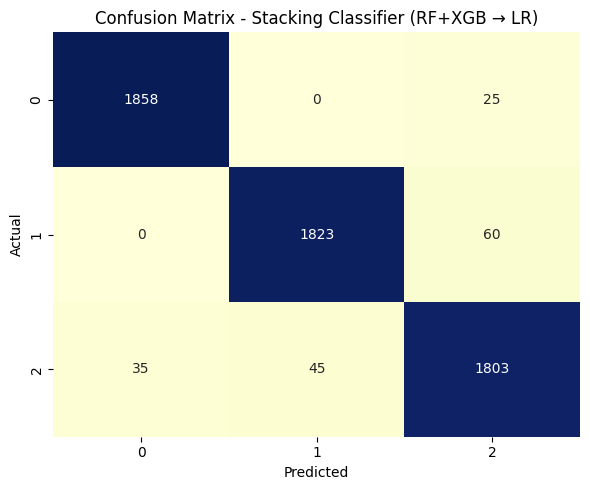

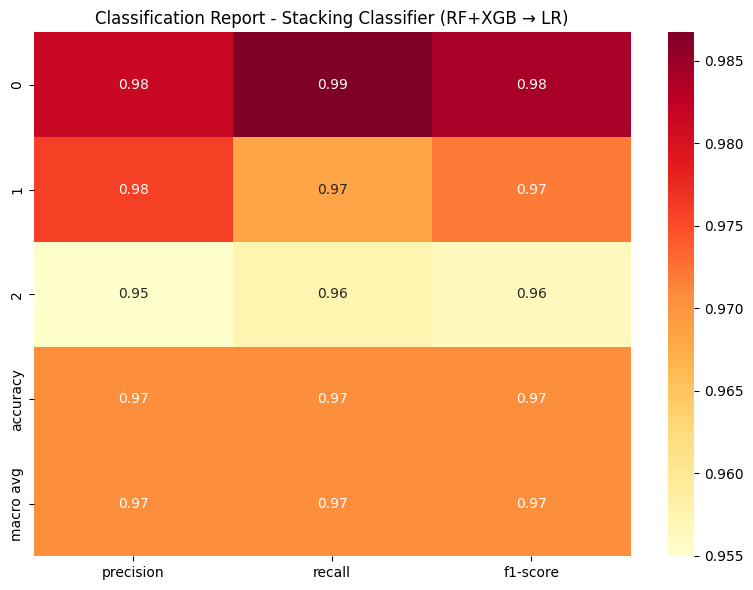

In [ ]:
# ✅ Updated Models with Logistic Regression as Meta-Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# ✅ Load the uploaded file
# try:
df = pd.read_csv("yield_df[1].csv")
# except FileNotFoundError:
#     print("File not found. Please upload 'yield_df[1].csv'.")
#     from google.colab import files
#     uploaded = files.upload()
#     if 'yield_df[1].csv' in uploaded:
#         df = pd.read_csv("yield_df[1].csv")
#     else:
#         raise FileNotFoundError("File 'yield_df[1].csv' not found after upload.")


# Drop index column
df = df.drop(columns=['Unnamed: 0'])

# Step 1: Bin 'hg/ha_yield' into 3 categories: Low, Medium, High
df['yield_class'] = pd.qcut(df['hg/ha_yield'], q=3, labels=['Low', 'Medium', 'High'])

# Step 2: Drop original yield column
df = df.drop(columns=['hg/ha_yield'])

# Step 3: Encode categorical columns
label_encoders = {}
for col in ['Area', 'Item']:  # Only encode object type columns
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 4: Encode the target variable 'yield_class'
le_yield = LabelEncoder()
df['yield_class'] = le_yield.fit_transform(df['yield_class'])

# Step 5: Define features and target
X = df.drop(columns=['yield_class'])
y = df['yield_class']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔧 Tuned Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=4, random_state=42)

# 🔧 Tuned XGBoost
xgb = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 🧠 Logistic Regression as Meta Model (instead of XGB)
meta_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')

# 📦 Stacking Classifier with 10-fold CV
stack_model = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta_model,
    cv=10,
    passthrough=True,
    n_jobs=-1
)

# 🔁 Train the Model
stack_model.fit(X_train_scaled, y_train)

# 🌟 Evaluation Function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("🔍 Performance Metrics")
    print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred, average='weighted'), 4))
    print("Recall   :", round(recall_score(y_test, y_pred, average='weighted'), 4))
    print("F1 Score :", round(f1_score(y_test, y_pred, average='weighted'), 4))
    return y_pred

# 📊 Confusion Matrix Plot
def plot_confusion(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# 📊 Classification Report Heatmap
def plot_classification_report(y_test, y_pred, title):
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlOrRd", fmt=".2f")
    plt.title(f"Classification Report - {title}")
    plt.tight_layout()
    plt.show()

# 📈 Evaluate
y_pred_stack = evaluate_model(stack_model, X_test_scaled, y_test)

# 📊 Plot Results
plot_confusion(y_test, y_pred_stack, "Stacking Classifier (RF+XGB → LR)")
plot_classification_report(y_test, y_pred_stack, "Stacking Classifier (RF+XGB → LR)")

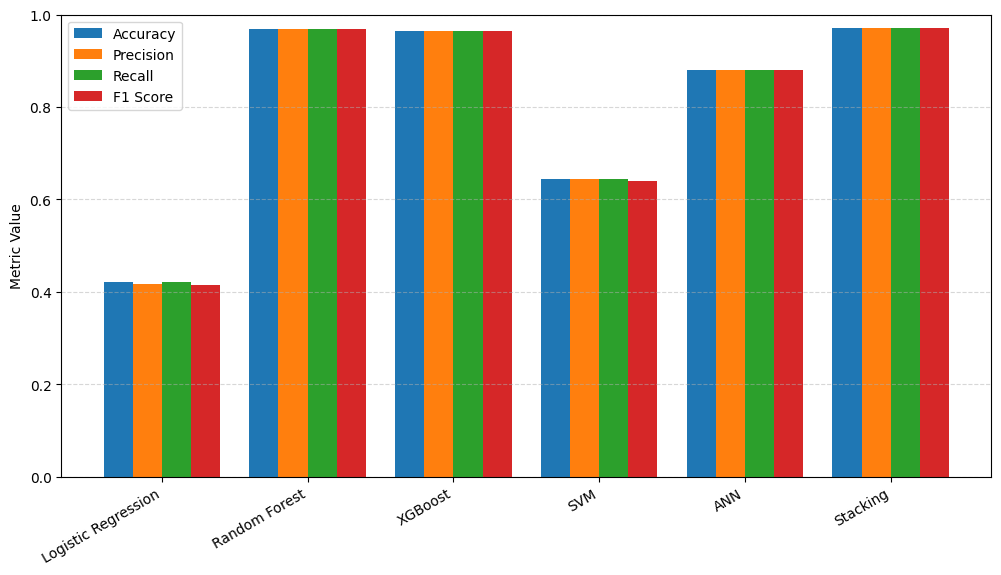

In [ ]:
# Dataset 2 Combined Evaluation Metrics Comparison Chart

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Store results
data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "SVM", "ANN", "Stacking"],
    "Accuracy": [0.4213, 0.9688, 0.9639, 0.6433, 0.8805, 0.9708],
    "Precision": [0.4167, 0.9688, 0.9638, 0.6441, 0.8808, 0.9708],
    "Recall": [0.4213, 0.9688, 0.9639, 0.6433, 0.8805, 0.9708],
    "F1 Score": [0.4157, 0.9688, 0.9639, 0.6407, 0.8805, 0.9708]
}

# Step 2: Convert to DataFrame
df = pd.DataFrame(data)

# Step 3: Combined Comparison Chart
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(df["Model"]))
width = 0.2  # width of each bar

plt.figure(figsize=(12,6))

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, df[metric], width, label=metric)

plt.xticks(x + width*1.5, df["Model"], rotation=30, ha="right")
plt.ylabel("Metric Value")

plt.ylim(0, 1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


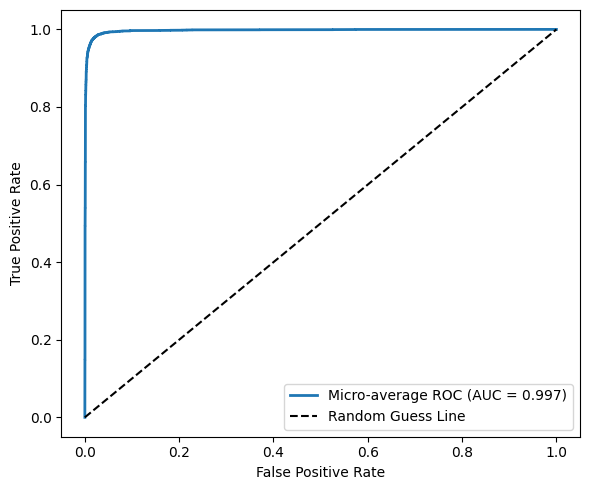

In [ ]:
# ✅ ROC Curve for Stacking Classifier on Dataset 2 (Multi-Class)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# 1️⃣ Get unique class labels
classes = np.unique(y_test)
n_classes = len(classes)

# 2️⃣ Binarize y_test for multi-class ROC (one-vs-rest format)
y_test_bin = label_binarize(y_test, classes=classes)

# 3️⃣ Get predicted probabilities from stacking model
#    (StackingClassifier supports predict_proba since meta-model is LogisticRegression)
y_score = stack_model.predict_proba(X_test_scaled)

# 4️⃣ Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# 5️⃣ Plot micro-average ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_micro, tpr_micro, linewidth=2,
         label=f"Micro-average ROC (AUC = {roc_auc_micro:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess Line")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
